In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima_model import ARIMA

In [4]:
df = pd.read_csv('temperatures.csv', sep=',')
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [29]:
temperature.index = temperature['Date']
temperature = temperature.drop(['Date'], axis=1)
temperature.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [6]:
sns.set(rc={'figure.figsize':(15, 6)})

<AxesSubplot:xlabel='Date'>

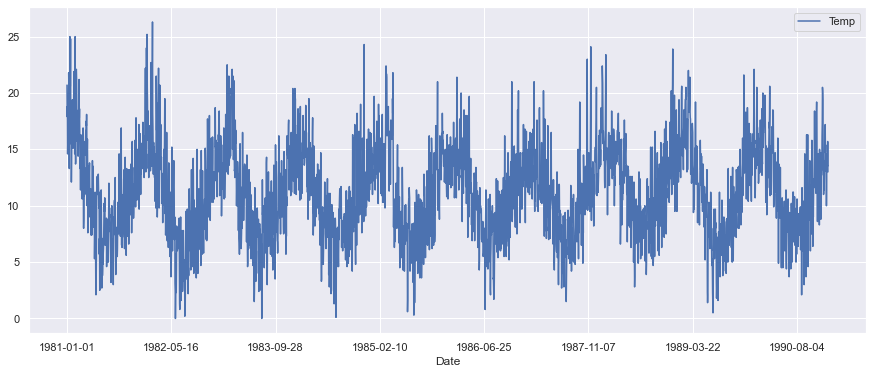

In [8]:
df.plot(x='Date', y='Temp')

In [30]:
# checar se é stationary: sim!
ad_fuller_result = adfuller(temperature)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.444804924611681
p-value: 0.00024708263003611787


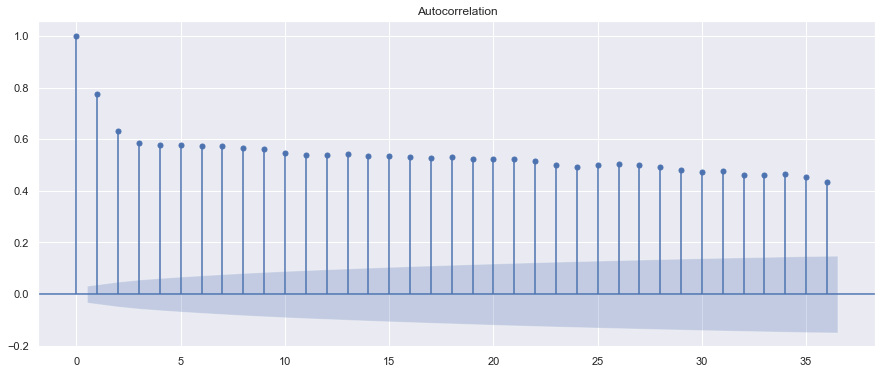

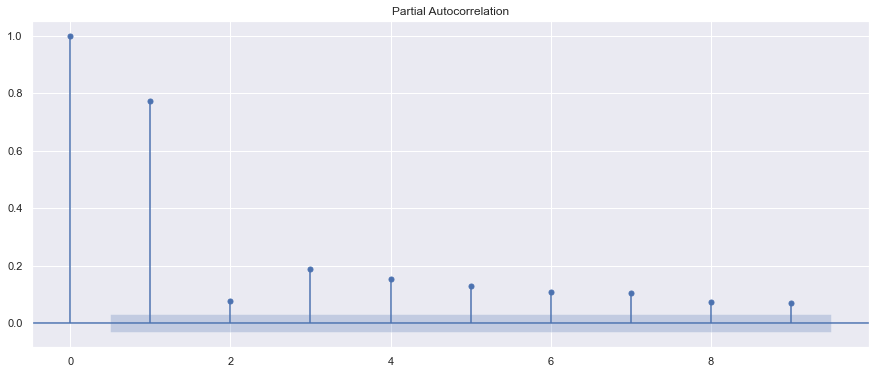

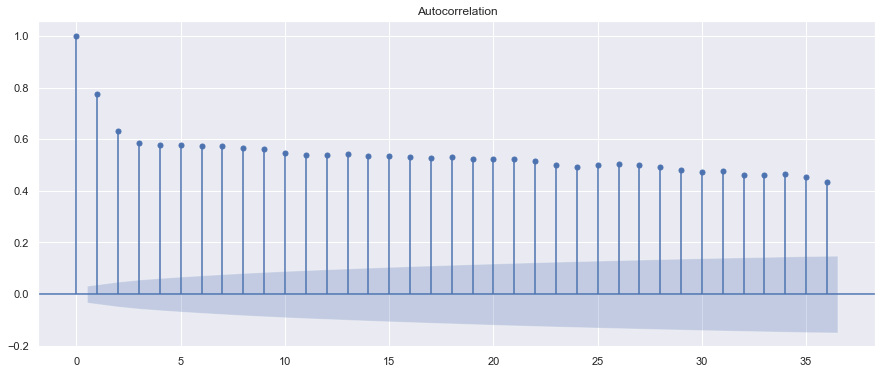

In [31]:
plot_pacf(temperature, lags=9)
plot_acf(temperature)

# Autoregression

In [32]:
# 2 logs?
ar_mod = AutoReg(temperature, 3)
res = ar_mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                     AutoReg(3)   Log Likelihood               -8542.572
Method:               Conditional MLE   S.D. of innovations              2.518
Date:                Wed, 20 Oct 2021   AIC                              1.850
Time:                        19:55:00   BIC                              1.858
Sample:                             3   HQIC                             1.853
                                 3650                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.8882      0.134     14.102      0.000       1.626       2.151
Temp.L1        0.7000      0.016     43.064      0.000       0.668       0.732
Temp.L2       -0.0594      0.020     -2.978      0.0

C:\Users\Victoria\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Victoria\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


AttributeError: 'ARMAResults' object has no attribute 'plot_diagnostics'

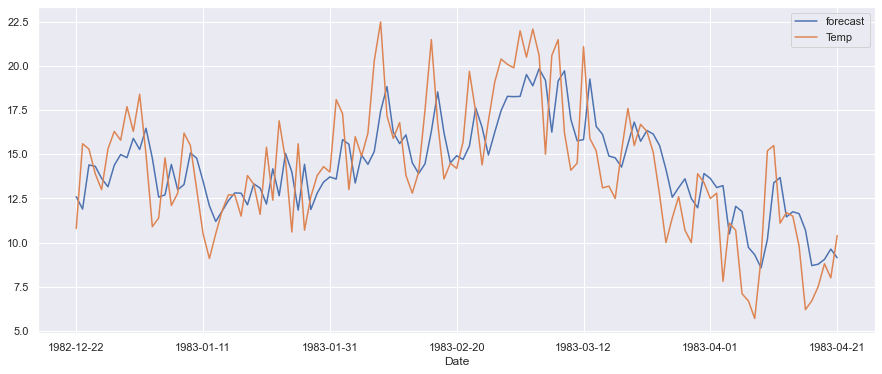

<Figure size 1152x648 with 0 Axes>

In [47]:
fig = res.plot_predict(720, 840)
fig = plt.figure(figsize=(16, 9))

In [48]:
fig = res.plot_diagnostics(fig=fig, lags=8)

AttributeError: 'ARMAResults' object has no attribute 'plot_diagnostics'

# ARIMA

In [50]:
# como chegar no order
mod = ARIMA(temperature, order=(2, 0, 1))
res = mod.fit()
print(res.summary())

C:\Users\Victoria\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Victoria\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated fre

                              ARMA Model Results                              
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                     ARMA(2, 1)   Log Likelihood               -8410.516
Method:                       css-mle   S.D. of innovations              2.423
Date:                Wed, 20 Oct 2021   AIC                          16831.033
Time:                        20:06:17   BIC                          16862.045
Sample:                             0   HQIC                         16842.077
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4979      0.876     13.121      0.000       9.780      13.215
ar.L1.Temp     1.4544      0.018     82.957      0.000       1.420       1.489
ar.L2.Temp    -0.4582      0.017    -26.582      0.0

In [56]:
# como chegar nos valores futuros?
start_index='1981-01-01'
#end_index = start_index + 10
#res.predict(start=start_index, end=end_index)
res.predict()

Date
1981-01-01    11.497878
1981-01-02    18.698940
1981-01-03    17.238764
1981-01-04    17.883290
1981-01-05    15.460136
                ...    
1990-12-27    14.057362
1990-12-28    13.768157
1990-12-29    13.562694
1990-12-30    13.504001
1990-12-31    14.682364
Length: 3650, dtype: float64

In [52]:
forecast = res.forecast()
forecast

(array([13.29696063]),
 array([2.42318824]),
 array([[ 8.54759895, 18.04632231]]))